In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as sla
import scipy.linalg as la
import scipy.stats
import matplotlib.pyplot as plt
import time
import pickle
from copy import copy
# %load_ext line_profiler

In [2]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=9
plt.rcParams['axes.titlesize']=plt.rcParams['font.size']
plt.rcParams['figure.figsize']=(6.8,4)

In [ ]:
# ipcluster start --engines=MPI -n 4
import ipyparallel as ipp
rc = ipp.Client()
rc[:].execute("from pi_flux import *")
rc[:].execute("import numpy as np")

In [24]:
# %%writefile pi_flux.py
import numpy as np
import scipy.linalg as la
import numpy.linalg as nla
import numpy.matlib

class Params:
    def __init__(self,
            Lx=16,
            Ly=16,
            t=1,
            Delta=1,
            m=0,
            bcx=1,
            bcy=-1,
            T=0,
            history=False):
        self.Lx=Lx
        self.Ly=Ly
        self.t = t
        self.Delta = Delta
        self.m = m
        self.bcx = bcx
        self.bcy = bcy
        self.T = T
        self.history = history
        if Lx<np.inf and Ly<np.inf:
            x1=np.diag(np.ones(Lx-1),-1)
            x1[0,-1]=bcx
            y1=np.diag(np.ones(Ly-1), -1)
            y1[0,-1]=bcy
            ym1=y1.T
            alterx=np.diag((-1)**np.arange(Lx))
            altery=np.diag((-1)**np.arange(Ly))
            txmat=np.kron(x1,altery)
            tymat=np.kron(np.eye(Lx),y1)
            onsitemat=np.kron(alterx,altery)
            y1alter=np.diag(np.ones(Ly-1)*(-1)**np.arange(Ly-1),-1)
            y1alter[0,-1]=bcy*(-1)**Ly
            ym1alter=y1alter.T
            delta11=np.kron(x1,y1alter)
            delta1m1=np.kron(x1,ym1alter)

            self.Hamiltonian= t*(txmat+txmat.T+tymat+tymat.T)+m*onsitemat+(delta11+delta11.T)*(-1j*Delta)+(delta1m1+delta1m1.T)*(1j*Delta)

    def bandstructure(self):
        val, vec = nla.eigh(self.Hamiltonian)
        sortindex = np.argsort(val)
        self.val = val[sortindex]
        self.vec = vec[:, sortindex]

        

# test

In [25]:
params=Params()

In [33]:
m_list=np.linspace(-1,1)
eigval_pbc_list=[]
for m in m_list:
    params=Params(m=m,bcx=0,bcy=0)
    params.bandstructure()
    eigval_pbc_list.append(params.val)


Text(0.5, 0, 'm')

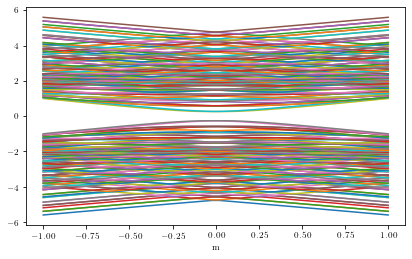

In [34]:
fig,ax=plt.subplots()
ax.plot(m_list,eigval_pbc_list)
ax.set_xlabel('m')
# ax.set_ylim([-1,1])

In [ ]:
if Lx<np.inf and Ly<np.inf:
                tx=np.diag(np.ones(Lx-1),-1)
                tx[0,-1]=bcx
                ty=np.diag(np.ones(Ly-1), -1)
                ty[0,-1]=bcy
                txmat=np.kron(tx,np.diag((-1)**np.arange(Ly)))
                tymat=np.kron(np.eye(Lx),ty)

                self.Hamiltonian= 
                onsitemat=
            

In [3]:
a = np.zeros((3, 3), int)

In [4]:
a

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
np.fill_diagonal(a,)